In [1]:
# Import necessary libraries
import MDAnalysis as mda
import pytim
from pytim.datafiles import WATER_GRO
import nglview as nv
import numpy as np
from pytim.observables  import TopologicalOrderParameter,WaterHydrogenBondingAdjacencyMatrix

In [2]:
# load the universe, as usual
u = mda.Universe(WATER_GRO)
ox = u.select_atoms('type O')
# the surface analysis is not required to use the topological order parameter, but in this example we look at a surface molecule
inter = pytim.ITIM(u, group=ox, cluster_cut=3.5, molecular=True, centered=True) 

In [3]:
# First, we need to define the criterion
# used to define the bonding:
HB = WaterHydrogenBondingAdjacencyMatrix()

# Then we use it to build the topological order parameter
# specifying that we want the 4th topological neighbors
psi = TopologicalOrderParameter(HB,4)

# Let's see the value of psi for the first 4 molecules 
# (we need to pass the oxygen atoms to HB through psi.compute) 
with np.printoptions(precision=4):
    print(psi.compute(ox)[:4])

[4.1454 3.2736 3.9129 3.5797]


In [4]:
# we can select, analyse and display water molecules that are connected using psi.path()
help(psi.path)

Help on method path in module pytim.observables.topological_order_parameter:

path(start, end) method of pytim.observables.topological_order_parameter.TopologicalOrderParameter instance
    Given the start and end of a path, returns the
    molecules within the connected path, if it exists.
    Accepts indices (zero-based) of the input group
    used to compute the observable, or two Atom objects,
    in which case it identifies the molecules to which they
    belong and returns an AtomGroup.

    :param  int|Atom  :  start, the first atom in the chain
    :param  int|Atom  :  end, the last atom in the chain



In [5]:
# let's select the oxygen atom of a random molecule
at1 = inter.atoms.residues[42].atoms[0]
at1

<Atom 844: OW of type O of resname SOL, resid 282 and segid SYSTEM and altLoc  >

In [6]:
# the 4th topological neighbor can be accessed using psi.neighbors, which 
# is indexed using the molecular indices
at4 = u.atoms[psi.neighbors[at1.resindex]]
at4

<Atom 7564: OW of type O of resname SOL, resid 2522 and segid SYSTEM and altLoc  >

In [7]:
# the set of atoms linking the first atom and that at the end of the 4th bond is:
path = psi.path(at1,at4)
path

<AtomGroup with 5 atoms>

In [8]:
path.indices

array([7563, 4461,  213, 5085,  843])

In [9]:
# We can now visualize the path:

w = nv.show_mdanalysis(u)
w.camera = 'orthographic'
w.center()
w.add_unitcell()
# all surface atoms
w.add_spacefill(selection=inter.atoms.indices, radiusScale=0.75,opacity=0.5)
w.add_spacefill(selection=path.indices,radiusScale=0.75)

# create a list of pairs of connected atoms
pairs = list(zip(path[:-1], path[1:]))    
for p in pairs:
    # display links 
    w.shape.add_cylinder(p[0].position, p[1].position, [0.0, 0.0, 0.0], .75)

w.display()


NGLWidget()

In [10]:
# this cell and the following one are only needed to embed a picture that can be visualized on github
w.render_image()

Image(value=b'', width='99%')

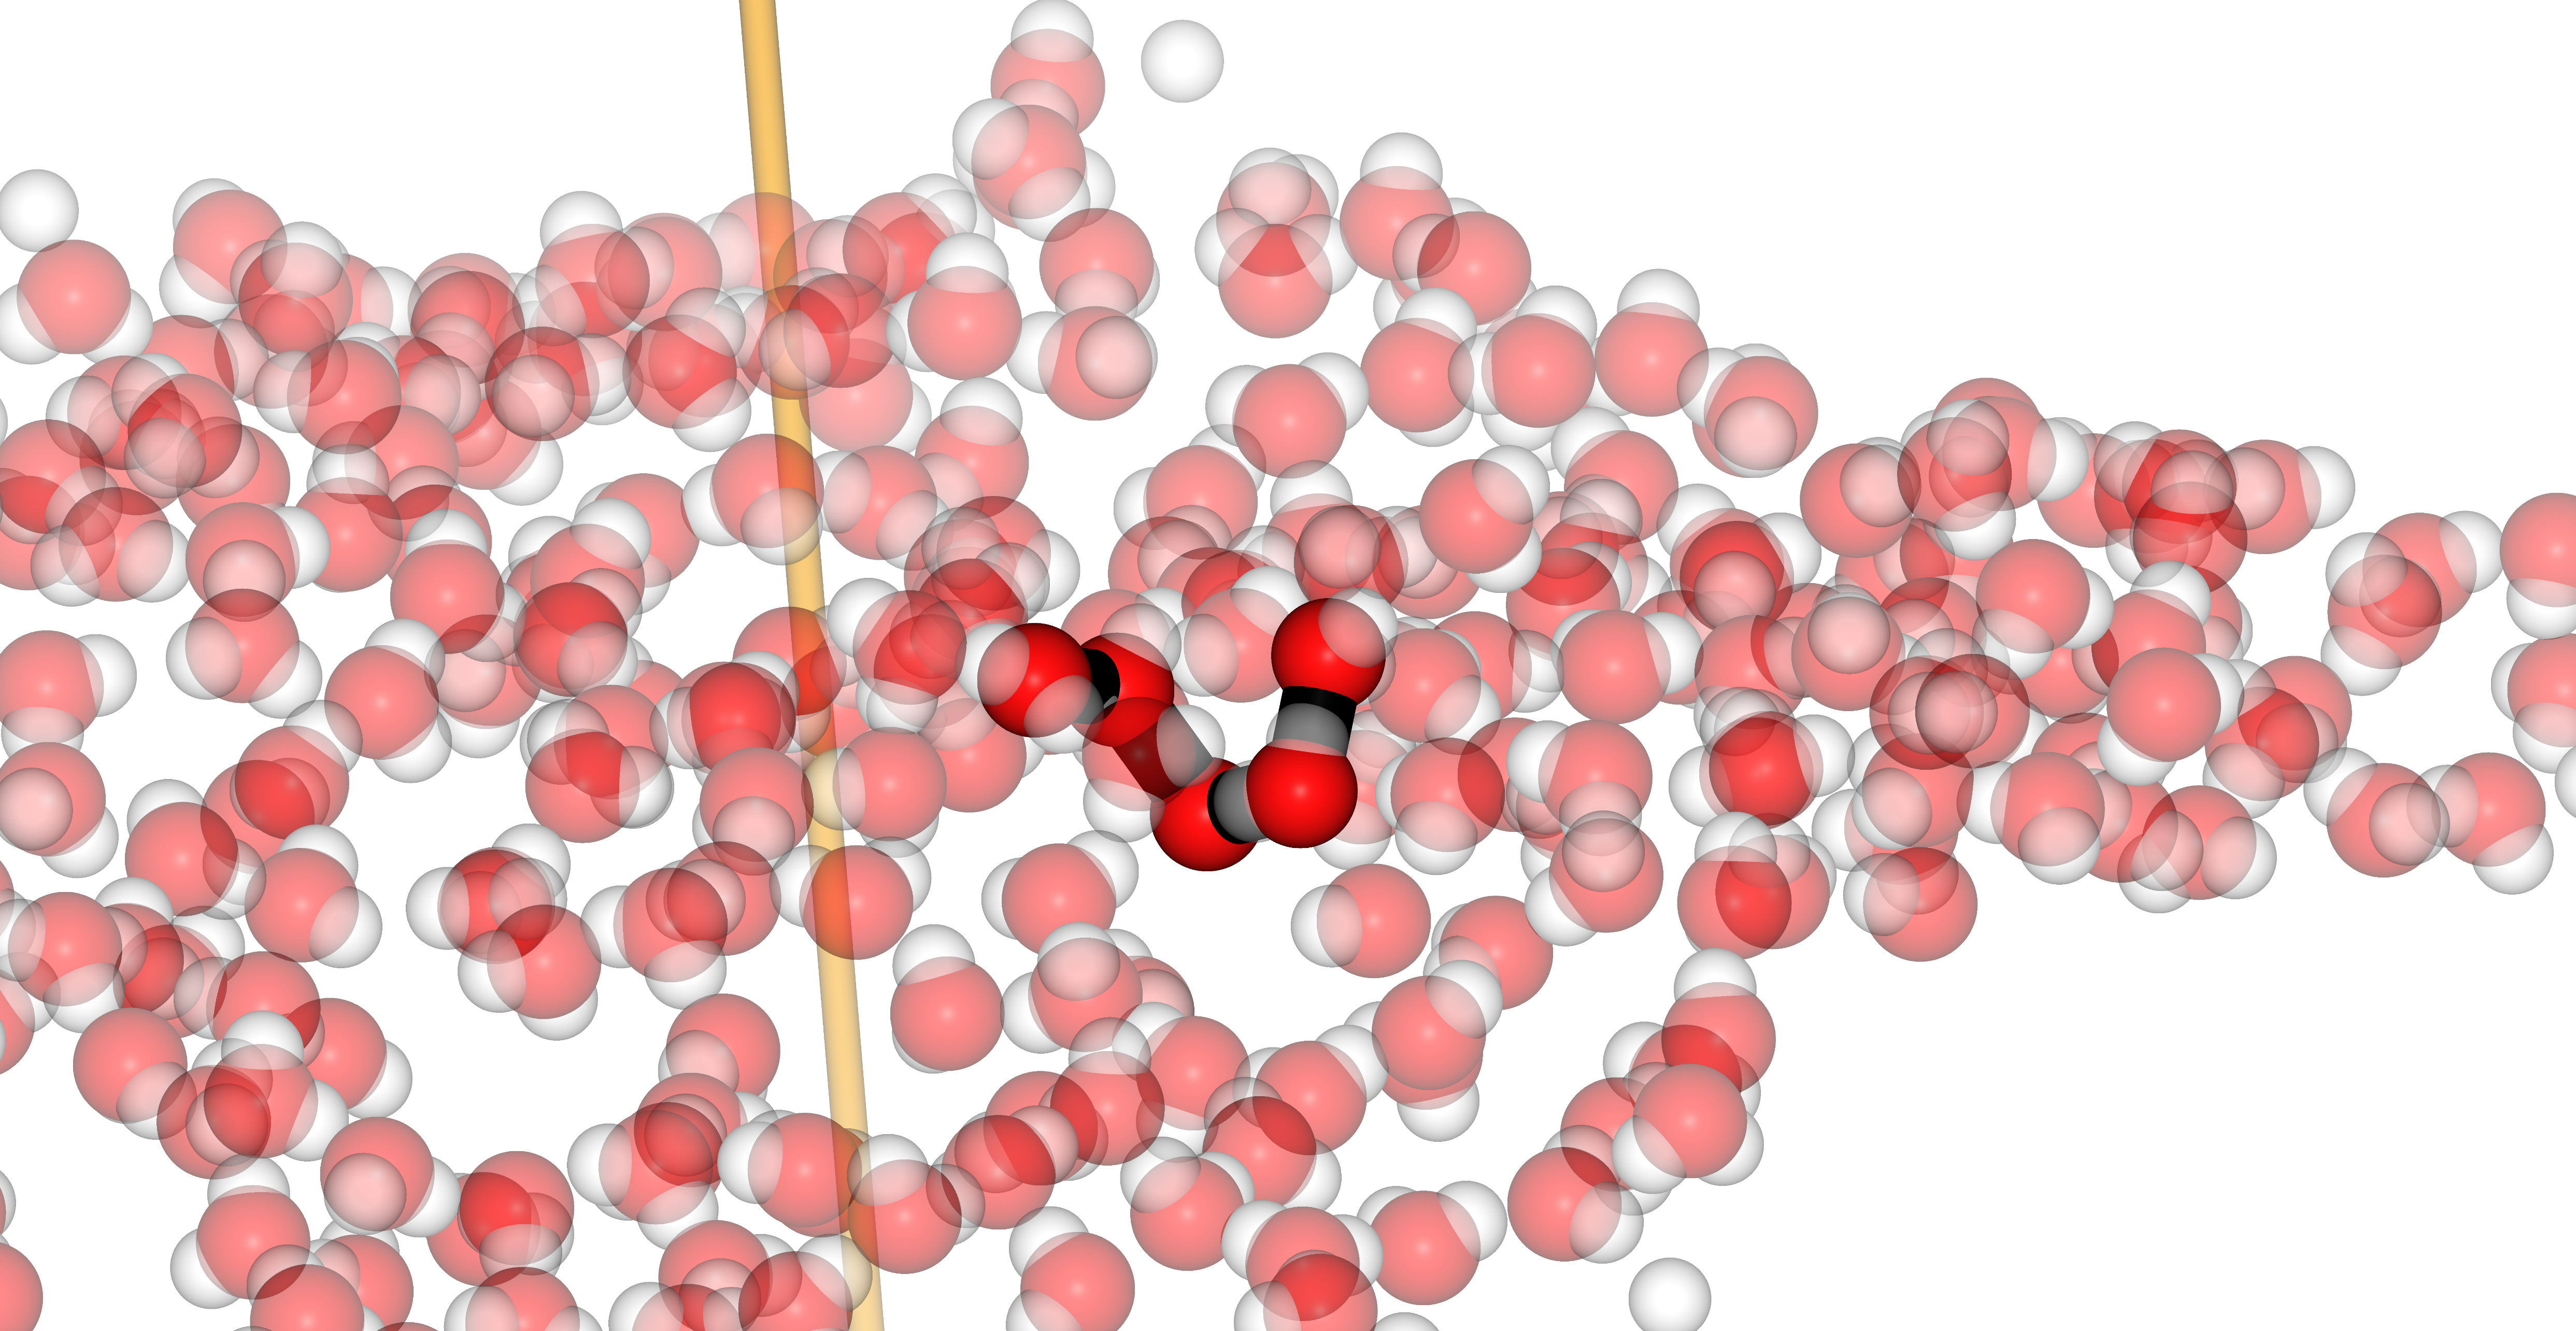

In [11]:
w._display_image()